# Chi-Squared Distribution

The chi-squared (or chi-square) distribution is often represented as:

$$ Q \sim \chi^2(k) $$

Where k is the degrees of freedom.

If $Z_1$, ... , $Z_k$ are independent, standard normal random variables (mean of 0, standard deviation of 1), then the sum of their squares,

$$ Q = \sum_{i=1}^{k} Z_i^2 $$

is distributed according to the chi-squared distribution with k degrees of freedom.

In other words, the chi-squared distribution is merely the square of the standard normal distribution. It has one degree of freedom if it is the square of a single normal distribution. If you add together the square of multiple normal distributions, you get a chi-squared distribution with multiple degrees of freedom.


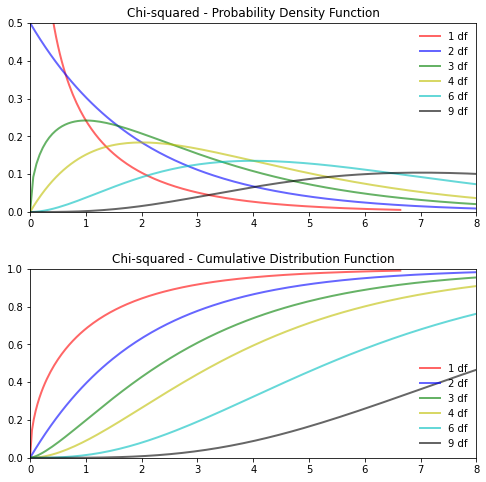

In [1]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np 

# https://matplotlib.org/examples/pylab_examples/subplots_demo.html
fig, ax = plt.subplots(nrows=2, figsize=(8, 8), sharex=True)

dfs = [ 
        { 'degrees': 1, 'color': 'r-'},
        { 'degrees': 2, 'color': 'b-'}, 
        { 'degrees': 3, 'color': 'g-'},
        { 'degrees': 4, 'color': 'y-'},
        { 'degrees': 6, 'color': 'c-'},
        { 'degrees': 9, 'color': 'k-'},
      ]

for entry in dfs:
  df = entry['degrees']
  color = entry['color']
  x = np.linspace(chi2.ppf(0, df), chi2.ppf(0.99, df), 200)
  ax[0].plot(x, chi2.pdf(x, df), color, lw=2, alpha=0.6, label=f'{df} df')
  ax[1].plot(x, chi2.cdf(x, df), color, lw=2, alpha=0.6, label=f'{df} df')


# Table setup
ax[0].legend(loc='best', frameon=False)
ax[0].set_ylim([0,.5])
ax[0].set_xlim([0,8])
ax[0].set_title('Chi-squared - Probability Density Function', fontsize=12)

ax[1].legend(loc='best', frameon=False)
ax[1].set_ylim([0,1])
ax[1].set_xlim([0,8])
ax[1].set_title('Chi-squared - Cumulative Distribution Function', fontsize=12)

# Set the formatting the same for both subplots
ax[0].tick_params(axis='both', which='both',  labelbottom=True)
ax[1].tick_params(axis='both', which='both',)
for tick in ax[0].get_xticklabels():
    tick.set_visible(True)
    
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots_adjust.html
plt.subplots_adjust(hspace=0.3)
plt.show()


It is an asymmetric distribution that has non-negative values. The chi-squared distribution always starts from $0$ on the left. 

Depending on the average and maximum values within the set, the curve of the chi-squared graph is typically skewed to the left. 

The chi-squared distribution does not often mirror real-life events like the normal distribution and Student's T distributions. 

It is often used in hypothesis testing to determine goodness of fit or as a test of independence.

Chi-squared tests generally compare a theoretical categorical distribution to an observed categorical distribution. (Yes, even though chi-squared itself is a continuous distribution). 



# Goodness of Fit Test

The chi-squared test statistic looks like this:

$$ \chi^2 = \sum_{i=1}^{k} \frac{ (o_i - e_i)^2 }{e_i} $$

Similar to when we need to meet the normal condition for a normal distribution, we need to make sure that our expected frequencies for each category are greater than 5 before we can perform this test. 





## Example - 1 degree of freedom
Let's consider an example: In an art class of 75 students, 11 are left handed. Does this class fit the prevailing theory that 12% of people are left handed, given a 5% significance level? 

Our hypothesis is:

$$ H_0: p = 0.12 $$
$$ H_A: p \ne 0.12 $$

First, we check that the expected frequency of left handed (11) and right handed (64) are each greater than 5, which they are.

**Decision Rule Method**

Using the decision-rule method, we calculate our test statistic first:

$$ \chi^2 = \frac{ (11 - 9)^2 }{9} + \frac{ (64 - 66)^2 }{66} = 0.5051 $$

Then we compare our test statistic to our critical chi-squared test statistic, which indicates the start of the *rejection region* where we can reject our $H_0$. The rejection region is the top $\alpha$ percentage of probability in the distribution.

We can find the critical chi-squared statistic using the Percent Point Function (PPF) in Python `scipy.stats.chi2.ppf`. The PPF is just the inverse of the CDF function, which makes sense because we want to find the statistic at the point where our cumulative distribution is $1 - \alpha$, or $0.95$.

In this example, our critical chi-squared statistic (the start of the rejection region) is $3.8415$.

Because $0.5051$ is not greater than $3.8415$, we assume that our data is not surprising and we don't reject $H_0$.

**p-value method**

The p-value is the probability density in the rejection region, which must be less than our $\alpha=0.05$ in order for us to reject $H_0$. 

We calculate the p-value by finding the CDF up until the rejection region and then subtracting that from 1. We can use `scipy.stats.chi2.cdf` to calculate the CDF. 

$$ \text{p-value} = 1 - \text{CDF}(\text{test statistic}) = 1 - \text{CDF}(0.5051) = 0.4773$$

Because the p-value is greater than our $\alpha = 0.05$, we assume that our data is not surprising and we don't reject $H_0$.


In [4]:
from scipy.stats import chisquare
from scipy.stats import chi2

trials = 75 # total trials
observed_successes = 11 # observed successes
p = .12 # expected proportion
alpha = 0.05

expected_successes = p * trials
observed_failures = trials - observed_successes
expected_failures = trials - expected_successes

# calculate the test statistic by hand
c_by_hand = ( ( ( observed_successes - expected_successes ) ** 2 ) / expected_successes ) + ( ( ( observed_failures - expected_failures ) ** 2 ) / expected_failures )

c, pval = chisquare([observed_successes, observed_failures], f_exp=[expected_successes, expected_failures])

pval_2 = 1 - chi2.cdf(c, 1)

print( "Test statistic (by hand): %6.4f" % c_by_hand )
print( "Test statistic: %6.4f" % c )
print( "Critical chi-squared statistic: %6.4f" % chi2.ppf( 1 - alpha, 1 ) )
print( "p-value (scipy.stats.chisquare function): %6.4f" % pval )
print( "p-value (scipy.stats.chi2.cdf function): %6.4f" % pval_2 )
print( "alpha: %6.4f" % alpha)


Test statistic (by hand): 0.5051
Test statistic: 0.5051
Critical chi-squared statistic: 3.8415
p-value (scipy.stats.chisquare function): 0.4773
p-value (scipy.stats.chi2.cdf function): 0.4773
alpha: 0.0500


## Example - 2 degrees of freedom

Out of 600 throws in a Rock-Paper-Scissors competition there were 235 rocks, 194 scissors, and 171 papers played. Is there evidence for a "weapon" preference at 5% significance?


## References
- [Chi-Squared Goodness of Fit test](https://youtu.be/ZNXso_riZag)

In [3]:
from scipy.stats import chisquare
from scipy.stats import chi2

alpha = 0.05
c, pval = chisquare([235, 194, 171], f_exp=[200,200,200])

print( "Test statistic: %6.4f" % c )
print( "Critical chi-squared statistic: %6.4f" % chi2.ppf( 1 - alpha, 2 ) )
print( "p-value: %6.4f" % pval )
print( "alpha: %6.4f" % alpha)

Test statistic: 10.5100
Critical chi-squared statistic: 5.9915
p-value: 0.0052
alpha: 0.0500


# References:
- [What is the Chi-Squared Distribution](https://youtu.be/80ffqpZdKiA)
